In [5]:
from pathlib import Path
from model import unidirectional, load_trained
import numpy as np
from tqdm.notebook import tqdm

foldername = "trained-unidirectional"
dirs = Path.cwd() / foldername

epochs = list(dirs.glob("Epoch */*.csv"))
similarity = {}
for i in tqdm(epochs):
    e = int(str(i).replace(str(dirs) + "\\", "").split("\\")[0].replace("Epoch ", ""))
    model = dirs / f"Epoch {e}" / f"classifier-{e}.pth"
    model = load_trained(model, unidirectional)

    scoring_weights = np.array(model.scoring_linear1.weight.tolist()[0])
    classify_weights = np.array(model.classifying_linear1.weight.tolist()[0])

    scoring_weights /= np.linalg.norm(scoring_weights)
    classify_weights /= np.linalg.norm(classify_weights)

    similarity[e] = np.dot(scoring_weights, classify_weights)

similarity = list(similarity.items())
print (similarity)
similarity.sort(key = lambda x: x[0])
similarity = [i[1] for i in similarity]

  0%|          | 0/150 [00:00<?, ?it/s]

[(0, -0.1349545324972813), (1, -0.20681515518739227), (10, -0.3026721901685908), (11, -0.3083999337277098), (12, -0.30081039804535403), (13, -0.29232846410968244), (14, -0.2971567319679663), (15, -0.30308768736672853), (16, -0.30371940718400825), (17, -0.3040987284929726), (18, -0.28393210701579813), (19, -0.29312466487006034), (2, -0.24487410872009607), (20, -0.2877280906368659), (21, -0.29705863838825297), (22, -0.2893673003497415), (23, -0.276855364452674), (24, -0.27880358272329375), (3, -0.2635578399216334), (4, -0.2768336541287909), (5, -0.3139642549253859), (6, -0.2955480699867882), (7, -0.29934472960417086), (8, -0.3008123400230954), (9, -0.3044605407389884)]


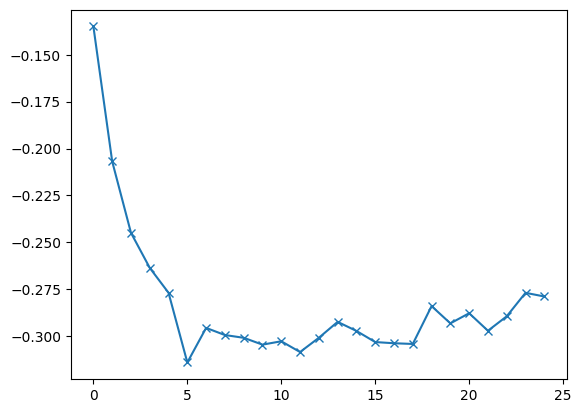

In [8]:
import matplotlib.pyplot as plt

plt.plot(similarity, marker = "x")
plt.show()